Das Feld RainToday ist klar das aussagekräftigste, die Location hingegen hat eigentlich fast gar keine aussagekraft, Min und MaxTemp haben wenig aber noch deutlich mehr aussagekraft als Location. RainToday soll auch das aussagekräftigste Feld, jedoch nicht allzu fest wie es bei mir ist (Siehe Grafik weiter unten). Rain Today soll meiner Meinung nach am aussagekräftigsten sein, da auch wir eine gewisse Wahrscheinlichkeit haben, wenn es heute regnet, dass es auch morgen regnet werden soll.

In [2]:
import pandas as pd
dataset_weather = pd.read_csv("Datensatz LB-259.csv", on_bad_lines="skip", sep=";")

In [4]:
X = dataset_weather[["Location", "MinTemp","MaxTemp", "RainToday"]]
y = dataset_weather[["RainTomorrow"]]
X.head()

,Location,MinTemp,MaxTemp,RainToday
0,3,13.4,22.9,0.0
1,3,7.4,25.1,0.0
2,3,12.9,25.7,0.0
3,3,9.2,28.0,0.0
4,3,17.5,32.3,0.0


In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si.fit(y)
y_ = si.transform(y)
y = pd.DataFrame(y_, columns=y.columns)
len(y[y.isna().any(axis=1)])
si.fit(X)
X_ = si.transform(X)
X = pd.DataFrame(X_, columns=X.columns)
len(X[X.isna().any(axis=1)])

0

In [6]:
# 👾 TODO: Split the titanic data into suitable test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state = 42
)

len(X_train), len(X_test)

(116368, 29092)

In [7]:
!pip install sklearn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

algorithms = {
    "Nearest Neighbors" : KNeighborsClassifier(3),

    "Decision Tree" : DecisionTreeClassifier(max_depth=5),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Net" : MLPClassifier(alpha=1, max_iter=1000),
    "Naive Bayes" : GaussianNB(),
    "LDA" : LinearDiscriminantAnalysis(),
}


for name, algorithm in algorithms.items():
    # 👾 TODO: Run each algorithm on X_train and y_train
    # using the .fit function; then evaluate it using
    # algorithm.score(X_test, y_test) and print the
    # name and score for each algorithm - which one 
    # performs the best?
    
    # You might need to use y_train.values.ravel()
    # rather than y_train in the fit()-function
    algorithm.fit(X_train, y_train.values.ravel())

    score = algorithm.score(X_test, y_test)
    print(name, round(score,2))

Nearest Neighbors 0.77
Decision Tree 0.79
Random Forest 0.79
Neural Net 0.8
Naive Bayes 0.76
LDA 0.79


In [9]:
import joblib
joblib.dump(algorithms["Naive Bayes"], 'dataset_weather_naive_bayes.joblib')
best_model = joblib.load('dataset_weather_naive_bayes.joblib')
best_model

GaussianNB()

In [18]:


# fit model
best_model.fit(X_train, y_train)


C:\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [20]:
y_pred_class = best_model.predict(X_test)

In [21]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7619964251340575


Text(0, 0.5, 'Mean decrease in impurity')

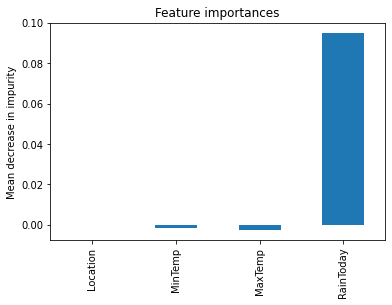

In [10]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22672
         1.0       1.00      1.00      1.00      6420

    accuracy                           1.00     29092
   macro avg       1.00      1.00      1.00     29092
weighted avg       1.00      1.00      1.00     29092



In [25]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[19243  3429]
 [ 3495  2925]]


In [27]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.23800357486594248


In [31]:
recall = TP/(TP + FN)
precision = TP/(TP + FP)
f1 = 2 * ((recall * precision)/(recall + precision))
recall

0.4579614842649132

In [32]:
sensitivität = TP / float(FN + TP)

(sensitivität)

print(metrics.recall_score(y_test, y_pred_class))

0.45560747663551404


In [37]:
Spezifizität = TN / (TN + FP)

print(Spezifizität)




0.8487561750176429


4.4: Ich denke mein Modell kann korrekt sein. Jedoch hängt eigentlich alles vom Regen ab. Wenn es heute regnet, ist die Wahrscheinlichkeit mehr als 90%, dass es morgen auch regnet. Meine Hypothese dafür ist, dass der Algorithmus keine richtigen Zusammenhänge zwischen den Temperaturen und dem Regnen gibt, dafür aber findet er grosse Zusammenhänge zwischen Regen heute und Regen morgen. Ich hätte mir erhofft, dass es diese Unterschiede herauskriegt und so die Wahrscheinlichkeit (Zusammenhänge) genauer ist.